# Прогноз оттока клиентов сети фитнес-центров

## Описание проекта
Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Фокус на сокращении оттока клиентов. Индикатор оттока - полное отсутствие посещений спортзала за последний месяц.

## Задача проекта
Провести анализ анкет и подготовить план действий по удержанию клиентов. А именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        - выделить целевые группы клиентов;
        - предложить меры по снижению оттока;
        - определить другие особенности взаимодействия с клиентами.

## Описание данных

Файл `gym_churn`.

Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.

## Шаг 1. Изучение и предобработка данных
Загрузим необходимые библиотеки, изучим датафрейм, выполним предобработку (если необходимо).

## Шаг 2. Исследовательский анализ данных (EDA)
Вычислим средние значения и стандартные отклонения для двух групп: тех, кто ушел в отток и тех, кто остался. Посмотрим на распределения признаков обеих групп и построим матрицу корреляций.

## Шаг 3. Построение модели прогнозирования оттока клиентов
Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

## Шаг 4. Кластеризация клиентов
На стандартизированных данных нарисуем дендрограмму и определим, какое кол-во кластеров можно выделить. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Для каждого полученного кластера посчитаем долю оттока. Ответим на вопрос, какие кластеры склонны к оттоку, а какие — надёжны.

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами
Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания.
Выделим 3-4 важных принципа и опишем примеры их реализации в виде определённых маркетинговых действий.

# Изучение и предобработка данных

In [1]:
#импортируем библ

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools

In [12]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#загрузим датафрейм

pth1 = '/datasets/gym_churn.csv'
pth2 = '/Users/nataliamarukh/Documents/DATA Analytics/Sprint 10. ML/_ПРОЕКТ ML/gym_churn.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
# проведем первичный анализ
def primary_analysis(df):
    display(df.head())
    print('*'*10)
    display(df.info())
    for column in df:
        print('-'*20)
        print(f'{df[column].name}')
        print(df[column].value_counts())
    print('*'*10)
    display(df.describe())
    print('*'*10)
    print('Кол-во явных дубликатов',df.duplicated().sum())

In [5]:
primary_analysis(df)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

None

--------------------
gender
1    2041
0    1959
Name: gender, dtype: int64
--------------------
Near_Location
1    3381
0     619
Name: Near_Location, dtype: int64
--------------------
Partner
0    2053
1    1947
Name: Partner, dtype: int64
--------------------
Promo_friends
0    2766
1    1234
Name: Promo_friends, dtype: int64
--------------------
Phone
1    3614
0     386
Name: Phone, dtype: int64
--------------------
Contract_period
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
--------------------
Group_visits
0    2351
1    1649
Name: Group_visits, dtype: int64
--------------------
Age
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64
--------------------
Avg_additional_charges_total
14.227470     1
17.082321     1
278.204461    1
120.457631    1
130.711299 

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

**********
Кол-во явных дубликатов 0


ВЫВОДЫ 

- 4 тыс записей. Пустых значений нет
- Возраст посетителей 20-40 лет
- 'Month_to_end_contract' -> в интовый
- С начала действия обонемента 88 клиентов так ни разу и не посетили спортзал
- 181 клиент не посещал зал в течение последнего месяца
- Четверть клиентов определена в группу тех, кто ушел
- Гендерное распределение примерно 50/50
- Клиенты в основном посещают зал рядом с домом/работой
- Почти половина клиентов является сотрудниками компаний-партнёров клуба
- Чуть менее трети клеинтов пришли по акции "приведи друга"
- 90% оставляют номер тел
- Абонементы длительностью 1, 6 и 12 мес. Третья перцентиль 6 мес
- Только 40% клиентов посещают групповые занятия
- Средний и медианный возраст 29 лет
- В реднем 4 мес осталось у клиентов до истечения срока действия абонемента
- Медиана Lifetime - 3 мес. 5 мес - лишь третья перцентиль Lifetime 
- Клиенты посещают зал менее 2х раз в неделю. Причем средний показатель за последний мес ниже среднего показателя за весь период (1.7 против 1.8)
- Явных дубликатов не обнаружено

In [6]:
#приведем наименования столбцов к нижнему регистру

df.columns = [x.lower() for x in df.columns]
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
#заменим тип данных в столбце 'month_to_end_contract' на int64

df['month_to_end_contract'] = df['month_to_end_contract'].astype('int64')
print(df['month_to_end_contract'].dtype.type)

<class 'numpy.int64'>


# Исследовательский анализ данных (EDA)

- определим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- построим матрицу корреляций и отобразим её.

In [8]:
#определим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

df.groupby('churn').mean()

gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.027882  
1                               1.044546

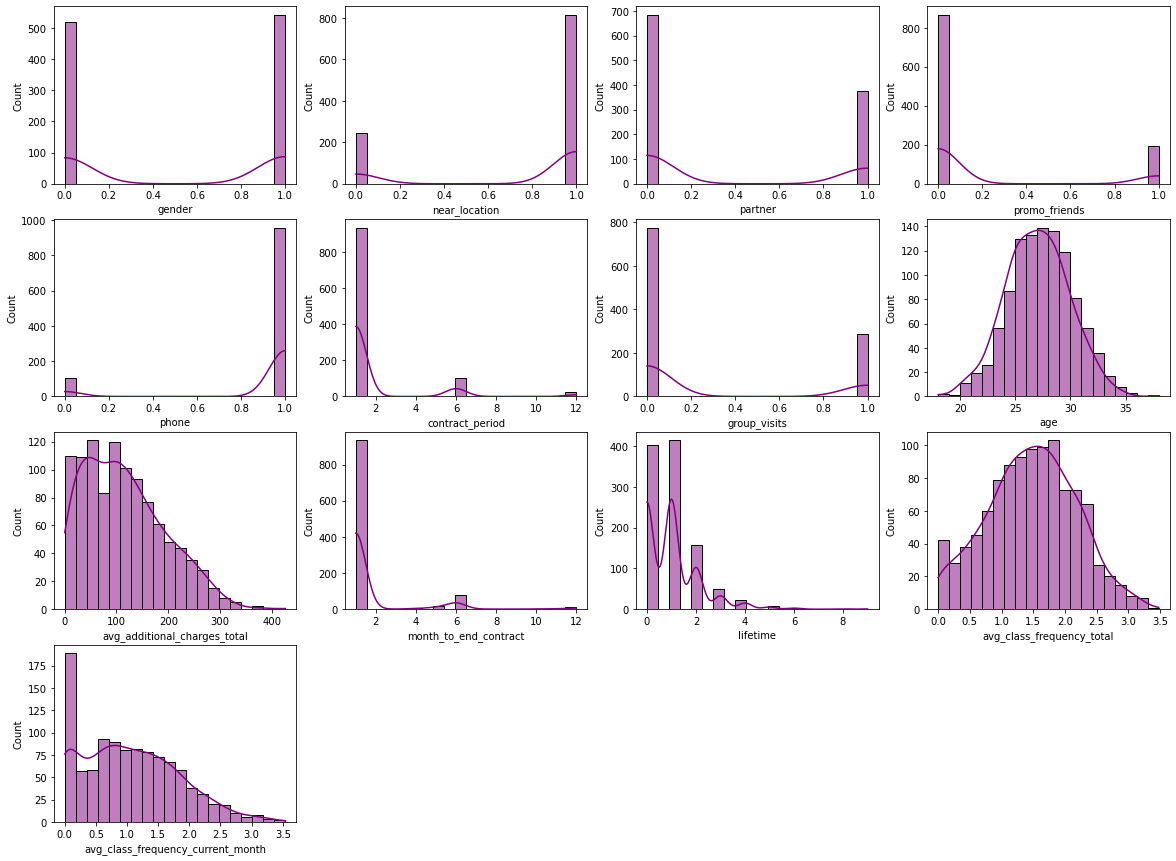

In [9]:
#построим гистограммы распределения признаков для тех, кто ушёл (отток)

i=1
plt.rcParams["figure.figsize"] = (20, 15)

for col in df.columns[:-1]:
    plt.subplot(4, 4, i)
    sns.histplot(df.query('churn == 1')[col],
                      color='purple',
                      kde=True,
                      bins=20,
                     )
    i += 1

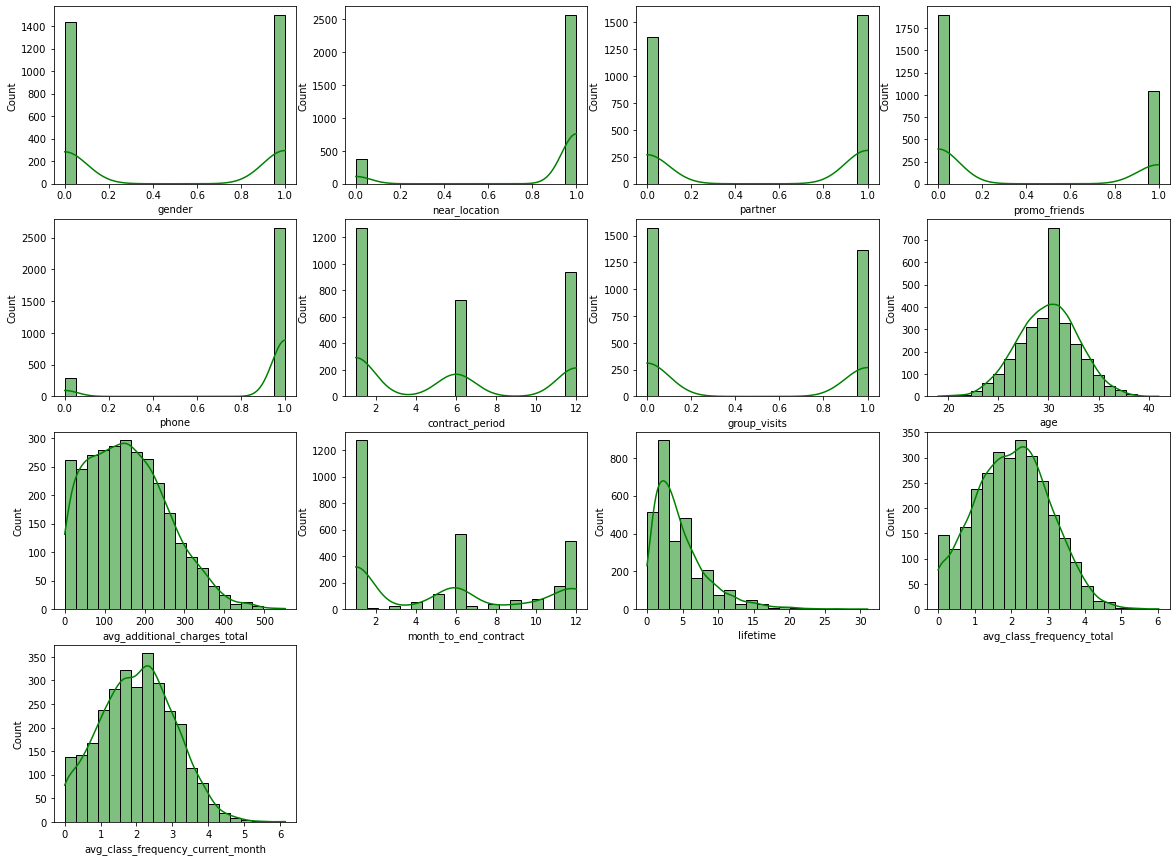

In [10]:
#построим гистограммы распределения признаков для тех, кто остался

i=1
plt.rcParams["figure.figsize"] = (20, 15)

for col in df.columns[:-1]:
    plt.subplot(4, 4, i)
    sns.histplot(df.query('churn == 0')[col],
                      color='green',
                      kde=True,
                      bins=20,
                     )
    i += 1

Характеристика ушедших по сравнению с оставшимися:

- нет гендерных отличий от оставшихся;
- живут/работают дальше от зала, чем те, кто остался;
- среди них гораздо меньше сотрудников компаний-партнёров клуба;
- меньше пришло по акции "приведи друга";
- оставляют номер тел также частно, как и оставшиеся;
- чаще покупают абонементы на месяц (средняя длительность действующего абонемента в 3,3 раза ниже, чем у оставшихся);
- меньше ходят на групповые занятия;
- средний возраст ниже (27 лет), чем у оставшихся (30 лет);
- в среднем тратят меньше на прочие услуги клуба;
- срок до окончания текущего действующего абонемента (в месяцах) в среднем 1,5 мес. в отличие от тех, кто остался (5 мес);
- лайфтайм в среднем 1 месяц. Случаи свыше 4-х мес похожи на выбросы;
- в среднем посещают 1.5 раза в неделю (оставшиеся - 2 раза);
- за последний месяц свыше 175 клиентов вовсе не посещали клубы, т.о. в среднем посещение снизилось до 1 раза в неделю. Тогда как у оставшихся сохранилась частота 2 раза/нед.

В Датасете достаточно много категориальных признаков, а корреляция Пирсона не умеет с ними работать. Воспользуемся коэф корреляции phik 

In [13]:
# воспользуемся коэф корреляции phik 

phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


gender  near_location  partner  \
gender                               1.00           0.00     0.00   
near_location                        0.00           1.00     0.00   
partner                              0.00           0.00     1.00   
promo_friends                        0.00           0.32     0.65   
phone                                0.00           0.00     0.00   
contract_period                      0.00           0.09     0.19   
group_visits                         0.01           0.24     0.02   
age                                  0.00           0.07     0.06   
avg_additional_charges_total         0.00           0.12     0.03   
month_to_end_contract                0.00           0.19     0.39   
lifetime                             0.01           0.06     0.10   
avg_class_frequency_total            0.00           0.06     0.00   
avg_class_frequency_current_month    0.00           0.07     0.02   
churn                                0.00           0.20     0.24   

                                   promo_friends  phone  contract_period  \
gender                                      0.00   0.00             0.00   
near_location                               0.32   0.00             0.09   
partner                                     0.65   0.00             0.19   
promo_friends                               1.00   0.00             0.15   
phone                                       0.00   1.00             0.00   
contract_period                             0.15   0.00             1.00   
group_visits                                0.19   0.00             0.10   
age                                         0.06   0.00             0.16   
avg_additional_charges_total                0.07   0.00             0.14   
month_to_end_contract                       0.33   0.00             0.97   
lifetime                                    0.10   0.04             0.20   
avg_class_frequency_total                   0.04   0.00             0.15   
avg_class_frequency_current_month           0.06   0.00             0.18   
churn                                       0.25   0.00             0.25   

                                   group_visits   age  \
gender                                     0.01  0.00   
near_location                              0.24  0.07   
partner                                    0.02  0.06   
promo_friends                              0.19  0.06   
phone                                      0.00  0.00   
contract_period                            0.10  0.16   
group_visits                               1.00  0.09   
age                                        0.09  1.00   
avg_additional_charges_total               0.05  0.08   
month_to_end_contract                      0.22  0.13   
lifetime                                   0.10  0.16   
avg_class_frequency_total                  0.07  0.15   
avg_class_frequency_current_month          0.09  0.21   
churn                                      0.27  0.52   

                                   avg_additional_charges_total  \
gender                                                     0.00   
near_location                                              0.12   
partner                                                    0.03   
promo_friends                                              0.07   
phone                                                      0.00   
contract_period                                            0.14   
group_visits                                               0.05   
age                                                        0.08   
avg_additional_charges_total                               1.00   
month_to_end_contract                                      0.13   
lifetime                                                   0.01   
avg_class_frequency_total                                  0.09   
avg_class_frequency_current_month                          0.06   
churn                                                      0.26 

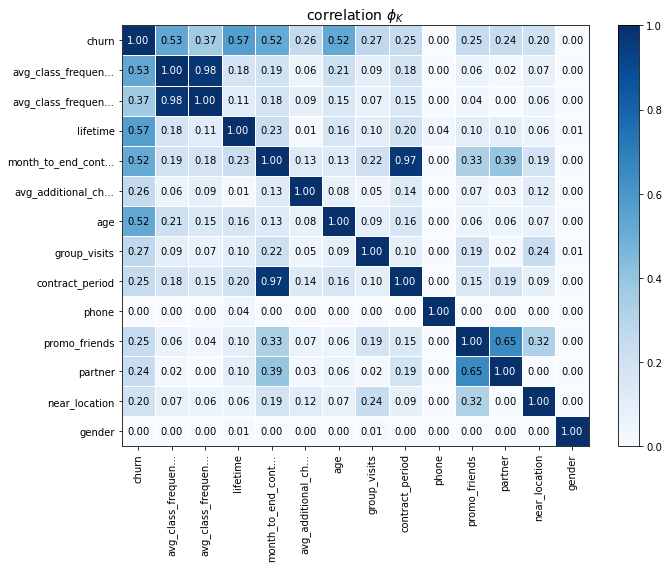

In [14]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, 
                        color_map="Blues", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 8))


plt.tight_layout();


Корреляцию менее 0.2 будем считать незначительной и не станем ее рассматривать.

Обнаружили корреляцию между переменными:

- сотрудник компании-партнёра клуба `partner` и привлеченный по акции "приведи друга" `promo_friends` (0.65). Видимо, клуб учитывает в акции "приведи друга" тех, кто приходит в качестве сотрудника компании-партнёра. То есть компания-партнер выступает к качестве того, кто привлекает в клуб друзей. 
- `lifetime` и `churn` (0.57). Чем дольше клиент пользуется услугами фитне-центов, тем он менее склонен к уходу. 
- `avg_class_frequency_total` и `churn` (0.37), `avg_class_frequency_current_month` и `churn` (0.53). Чем чаще клиенты посещают клуб, тем меньше они склонны прекращать посещение. Причем корреляция с данными за последний месяц гораздо сильнее, чем со статистикой за весь период.
- `month_to_end_contract` и `churn` (0.52). Чем больше времени до истечения абонемента, тем клиенты менее склонны прекращать посещение спортзала.
- `promo_friends` и `month_to_end_contract` (0.33). Похоже, что акция запущена относительно недавно, т.к. видим более длительные сроки до конца абонемента.
- похоже, что в партнерских программах участвуют длинные абонементы, так как есть корреляция м/д `partner` и `month_to_end_contract` (0.39). 
- `contract_period` и `month_to_end_contract` (0.97). Это очевидно: чем длинее абонемент, тем больше времени осталось до его истечения.
- `lifetime` и `month_to_end_contract` (0.23). Лояльные клиенты покупают длинные абонементы.
- `avg_additional_charges_total` и `churn` (0.26). Клиенты, которые пользуются доп услугами, менее склонны покидать спортзал. Им нравится наш сервис.
- `age` и `churn` (0.52), `age` и `avg_class_frequency_current_month` (0.21). Выше мы уже заметили, что средний возраст бросивших заниматься ниже, чем у тех, кто продолжает ходить в спортзал.
- `group_visits` и `churn` (0.27). Напрашивается тоже самое предположение, что и с доп сервисами. Видим также корреляцию м/д `group_visits` и `month_to_end_contract` (0.22), а также `near_location` (0.24).
- `contract_period` и `churn` (0.25). Чем выше длительность текущего действующего абонемента, тем меньше оттока. Клиенты менее склонны бросать спортзал, если берут длинные абонементы.
- `promo_friends` и `near_location` (0.32). Клиенты советуют друзьям (живущим неподалеку) и коллегам.
- `promo_friends` и `month_to_end_contract` (0.33). Привлеченные по акции клиенты берут абонементы на более длительный срок.
- `partner` и `churn` (0.24). Отток среди сотрудников компаний-партнеров ниже.


interval columns not set, guessing: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


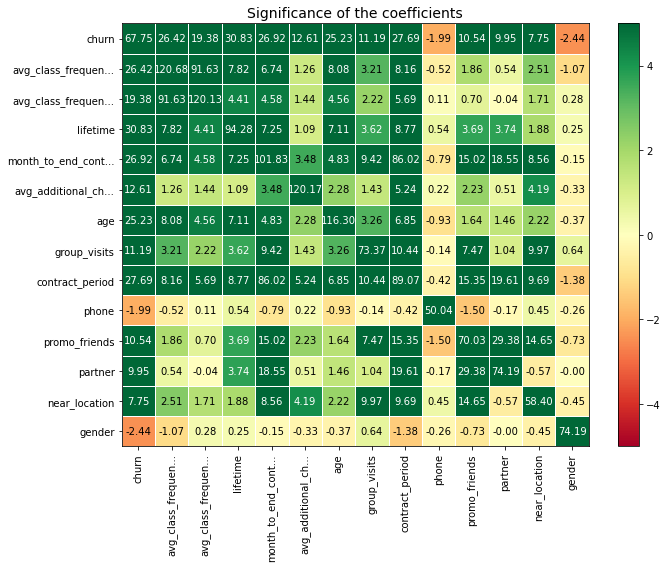

In [15]:
#посмотрим на статистическую значимость корреляций

significance_overview = df.significance_matrix()

plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1, figsize=(10, 8))
plt.tight_layout()

Значимость обнаружена у всех установленных выше корреляций.

interval columns not set, guessing: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']


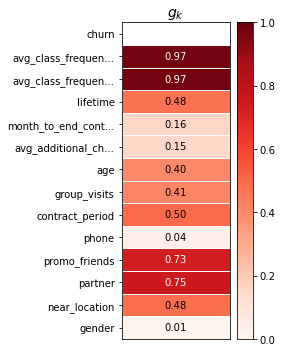

In [16]:
# посмотрим на общую корреляцию одной переменной со всеми другими переменными в наборе данных, 
# рассчитаем глобальный коэффициент корреляции

global_correlation, global_labels = df.global_phik()

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(4,5),
                        color_map="Reds", title=r"$g_k$",
                        fontsize_factor=1)
plt.tight_layout()

Высокие значения глобального коэф корреляции:

- 'avg_class_frequency_total', 'avg_class_frequency_current_month', 

Средние значения глобального коэф корреляции:

- 'partner', 'promo_friends', 'contract_period' , 'lifetime', 'age', 'near_location','group_visits'


In [17]:
#составим список числовых полей

#numeric_cols = ['contract_period', 'age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
#                'avg_class_frequency_total', 'avg_class_frequency_current_month']


In [18]:
#посчитаем выборочные перцентили числовых признаков

#for col in numeric_cols:
#    print(f'{df[col].name}')
#    print(np.percentile(df[col], [90, 95, 99]))
#    print()

# Построение модели прогнозирования оттока клиентов

- Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    - Разобьем данные на обучающую и валидационную выборку функцией train_test_split().
    - Обучим модель на train-выборке двумя способами:
        - логистической регрессией,
        - случайным лесом.
- Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Определим, какая модель показала себя лучше на основании метрик.

In [19]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)

X = df.drop('churn', axis = 1) 
y = df['churn'] 

#разделяем модель на обучающую и валидационную выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# зададим список моделей

models = [LogisticRegression(solver='liblinear', random_state=0),
          RandomForestClassifier(n_estimators = 100, random_state=0)]

In [21]:
# функция, которая принимает на вход модель и данные и выводит метрики

def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(
        'Accuracy: {:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} ROC_AUC:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, y_proba)
        )
    )
    


In [22]:
# цикл, который выводит метрики по списку моделей

for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)
    print()

LogisticRegression(random_state=0, solver='liblinear')
Accuracy: 0.93 Precision:0.86 Recall:0.83 F1:0.85 ROC_AUC:0.97

RandomForestClassifier(random_state=0)
Accuracy: 0.92 Precision:0.84 Recall:0.82 F1:0.83 ROC_AUC:0.97



In [23]:
# обучим финальную модель
final_model = LogisticRegression()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test) 

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
coef = abs(final_model.coef_)
features = pd.DataFrame({'feature':X.columns, 'coef':coef.flatten()})
features.sort_values('coef', ascending=False)


feature      coef
12  avg_class_frequency_current_month  5.138571
11          avg_class_frequency_total  4.499926
4                               phone  1.234911
10                           lifetime  1.019761
3                       promo_friends  0.773818
6                        group_visits  0.448727
0                              gender  0.260340
9               month_to_end_contract  0.219181
1                       near_location  0.109319
7                                 age  0.097172
2                             partner  0.092483
5                     contract_period  0.039310
8        avg_additional_charges_total  0.004391

На основании метрик лучше себя показала модель логистической регрессии.

# Кластеризация клиентов

- Стандартизируем данные.
- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. В учебных целях примем за число кластеров n=5, а не на основании изучения графика из предыдущего пункта.
- Посмотрим на средние значения признаков для кластеров. Сделаем промежуточные выводы.
- Посмотрим распределения признаков для кластеров. Сделаем промежуточные выводы.
- Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Определим, отличаются ли они по доле оттока. Ответим на вопрос, какие кластеры склонны к оттоку, а какие — надёжны.


In [24]:
# создадим объект класса StandardScaler и применим его к обучающей выборке

scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки

X_test_st = scaler.transform(X_test)


In [25]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(df)

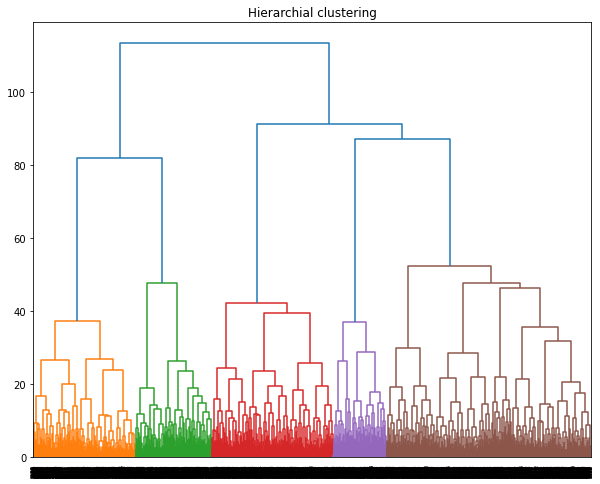

In [26]:
# построим матрицу расстояний на стандартизованной матрице признаков
linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(10, 8))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show() 

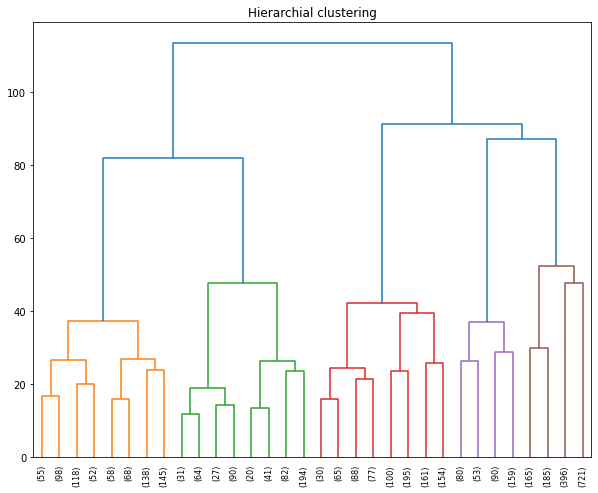

In [27]:
# построим матрицу расстояний на стандартизованной матрице признаков

plt.figure(figsize=(10, 8))  
dendrogram(linked, orientation='top',
           leaf_rotation=90, leaf_font_size=8,
           truncate_mode = 'level', p=4
          )
plt.title('Hierarchial clustering')
plt.show() 

Дендрограмма выделила 5 кластеров в стандартизированных данных.

In [28]:
# обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов 

# зададим модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

# сохраним метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean()

gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.503676       0.000000  0.459559       0.075368  0.917279   
1           0.492829       0.936115  0.764016       0.534550  0.919166   
2           0.507917       1.000000  0.323995       0.213155  0.903776   
3           0.521186       0.996610  0.282203       0.208475  0.904237   
4           0.518895       0.968023  0.744186       0.526163  0.873547   

            contract_period  group_visits        age  \
cluster_km                                             
0                  2.069853      0.211397  28.522059   
1                 10.447197      0.516297  29.962190   
2                  1.546894      0.287454  26.926918   
3                  1.882203      0.452542  30.237288   
4                  8.859012      0.534884  29.728198   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km                                                                  
0                             132.741216               1.950368  2.757353   
1                             161.853561               9.477184  4.833116   
2                             113.173051               1.500609  1.031669   
3                             157.988625               1.794915  4.923729   
4                             162.907495               8.155523  4.411337   

            avg_class_frequency_total  avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.706629                           1.515890   
1                            2.788103                           2.786919   
2                            1.449720                           1.037592   
3                            2.203432                           2.207359   
4                            0.957744                           0.943967   

               churn  
cluster_km            
0           0.450368  
1           0.007823  
2           0.961023  
3           0.003390  
4           0.024709

Во втором кластере отток составил 96%, в нулевом - 45%. В остальных кластерах отток менее 2.5%. Ниже всего показатель оттока у 3-го кластера (всего 0.3%).

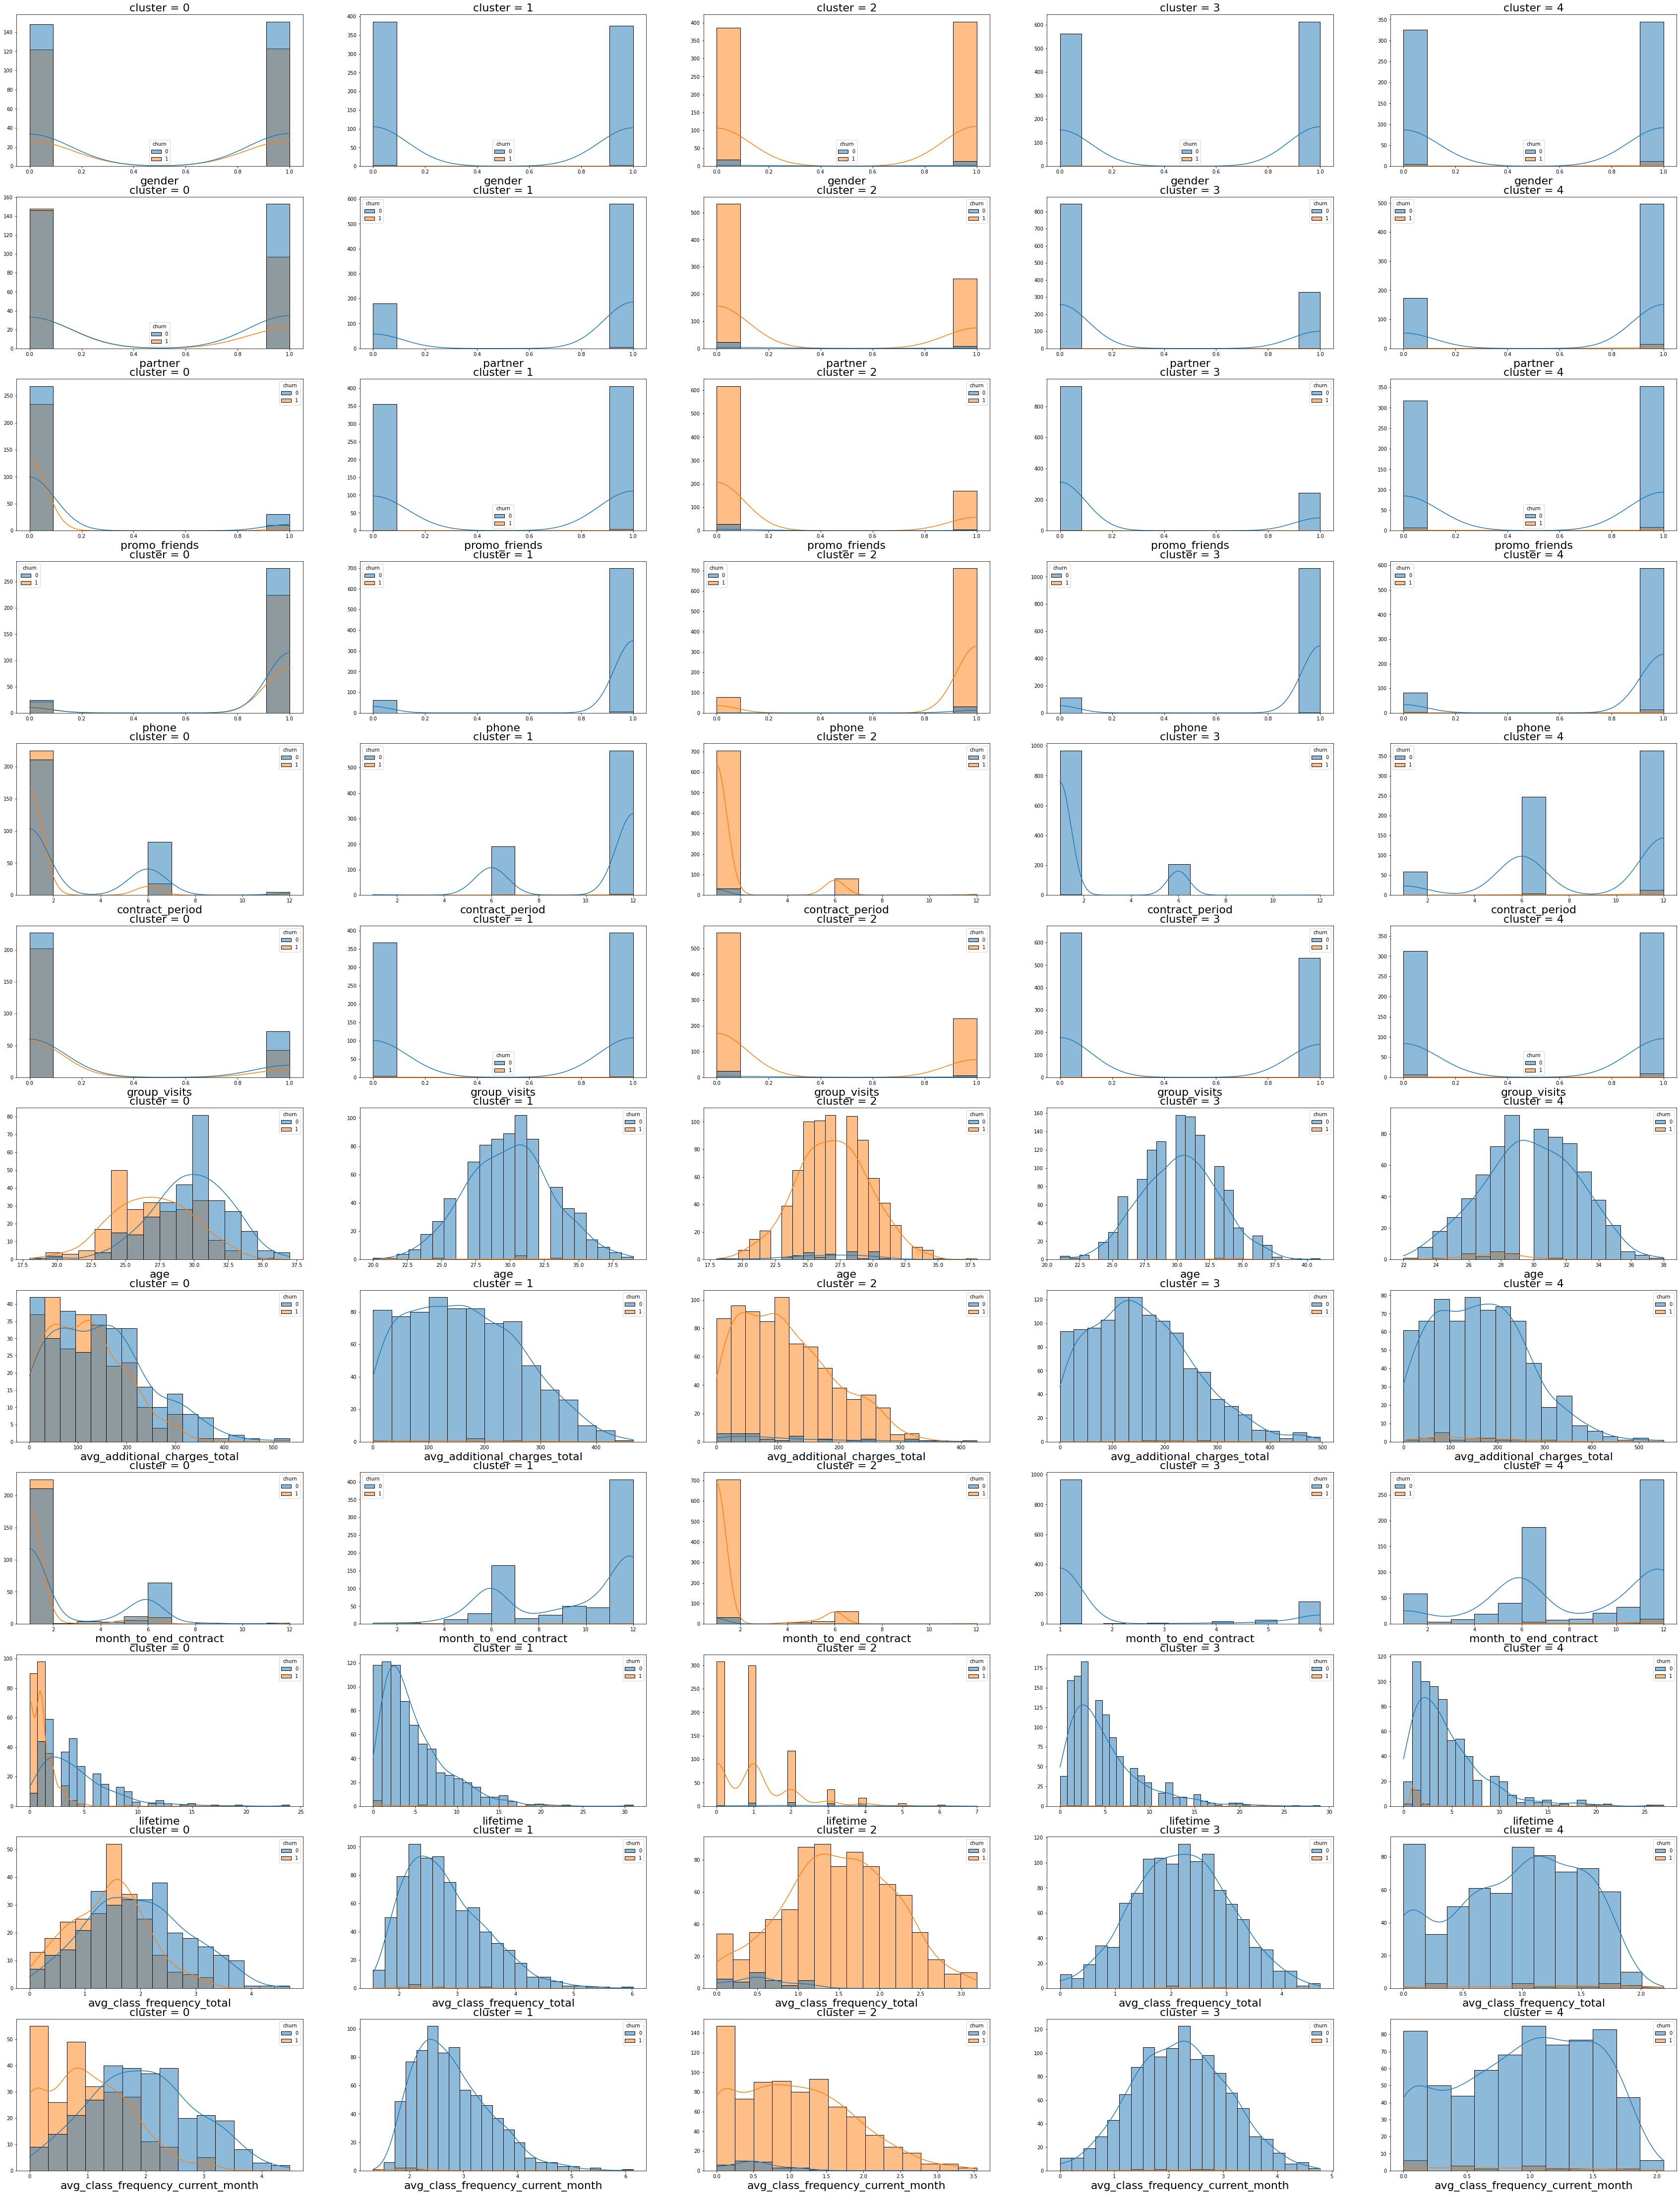

In [29]:
#построим гистограммы для каджого признака внутри кластеров

i=1
plt.rcParams["figure.figsize"] = (60,80)
cluster_list = sorted(df['cluster_km'].unique())

for col in df.drop('near_location', axis=1).columns[:-2]:
    for cl in cluster_list:
        plt.subplot(12, 5, i)
        ax = sns.histplot(df[df['cluster_km'] == cl],
                     x=col,
                     hue = 'churn',
                     kde=True,
                    )
        ax.set_title('cluster = {}'.format(cl), fontsize=22)
        ax.set_xlabel('{}'.format(col), fontsize=22)
        ax.set_ylabel('')
        i += 1

После отрисовки гистограмм видим преобладание ушедших клиентов в кластере 2 по всем признакам

In [30]:
# определим функцию отрисовки графиков попарных признаков для кластеров

def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

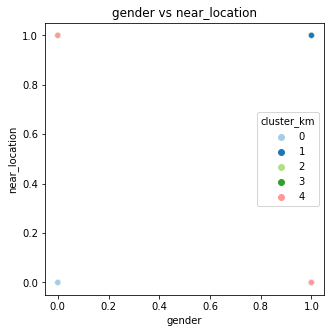

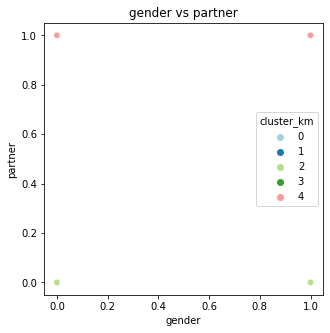

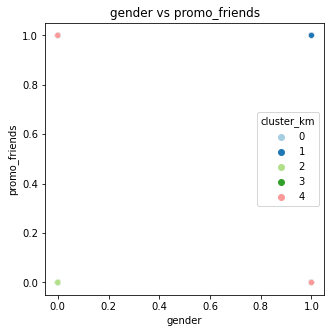

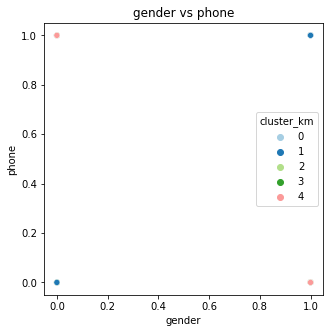

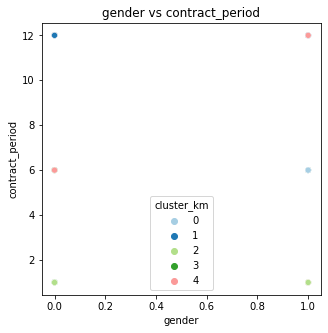

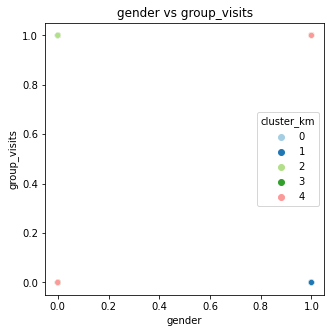

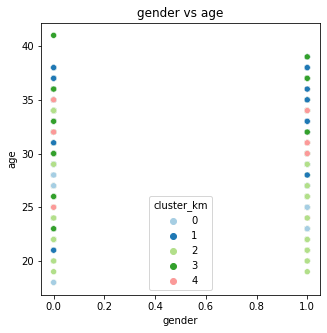

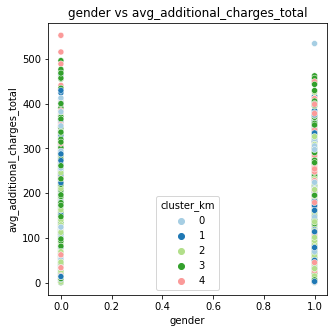

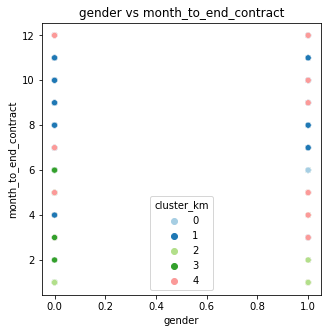

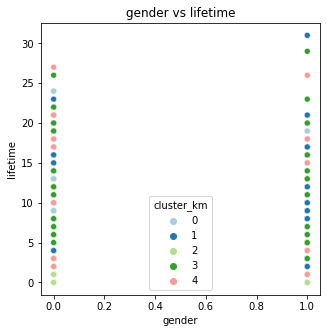

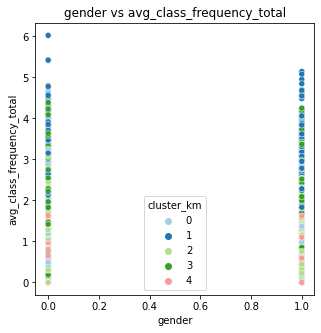

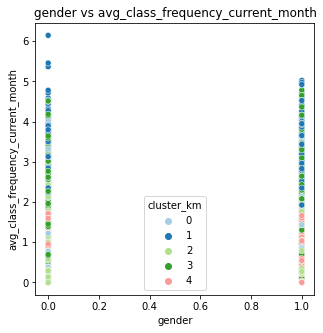

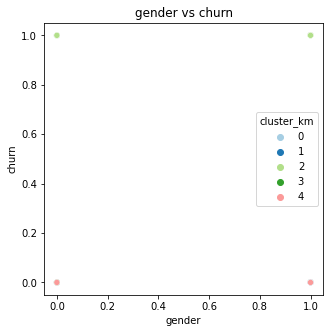

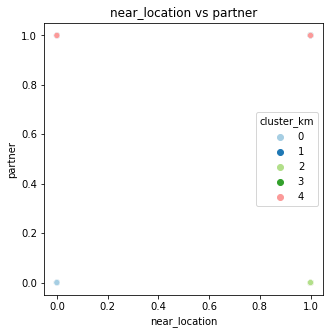

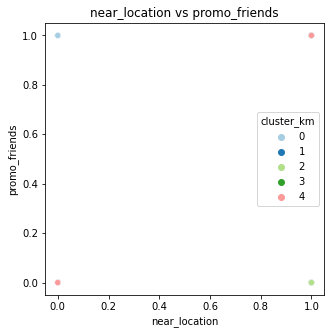

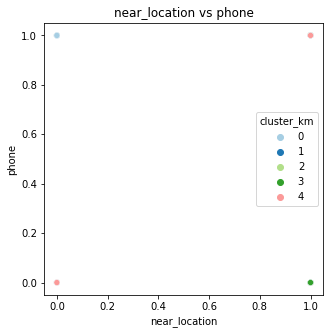

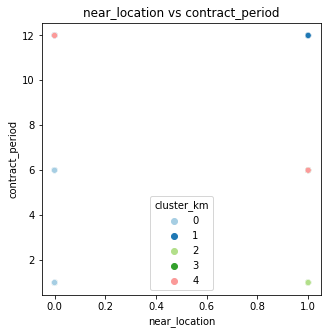

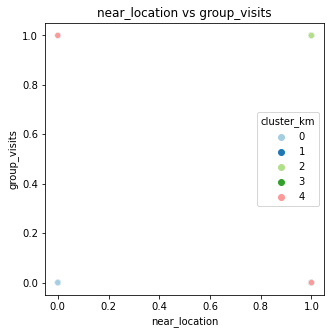

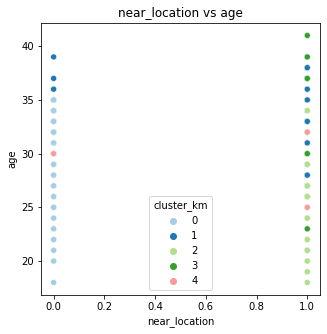

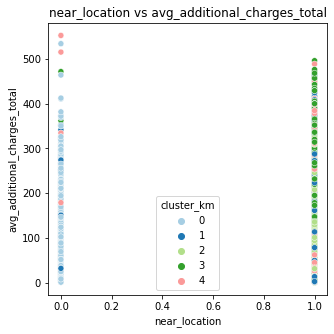

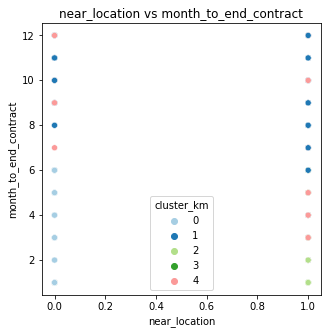

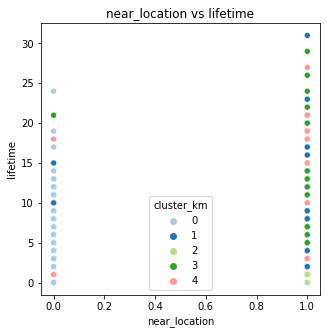

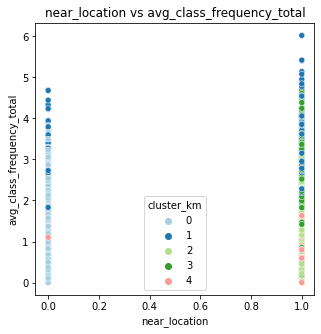

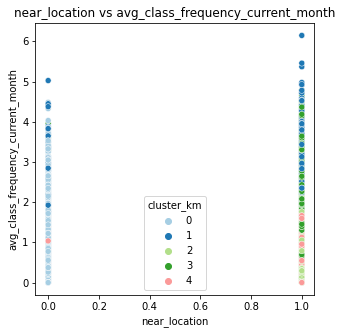

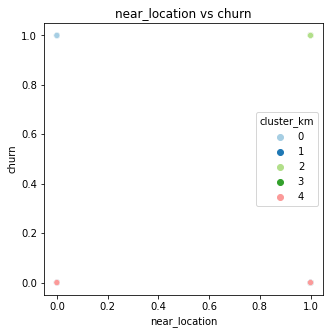

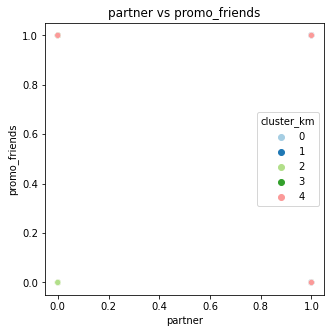

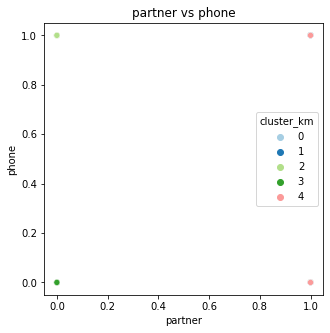

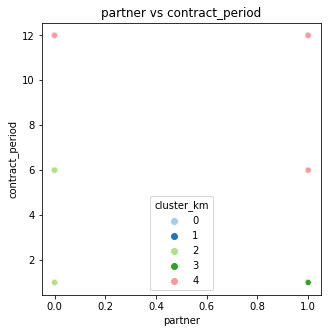

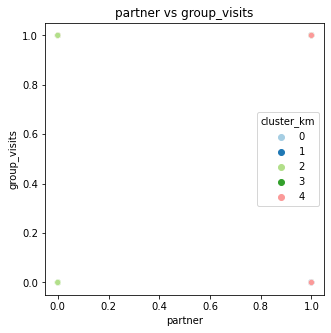

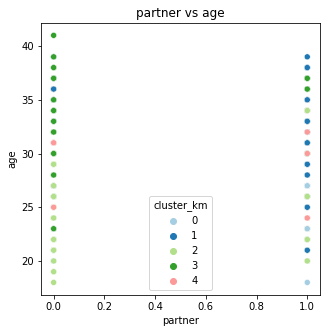

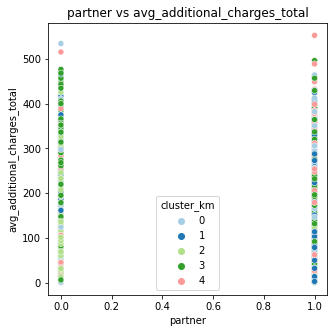

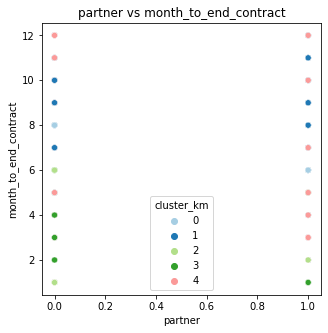

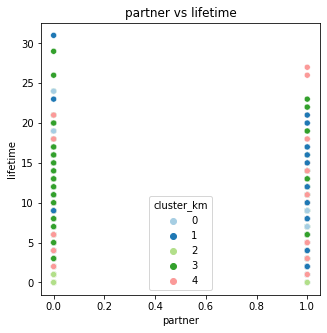

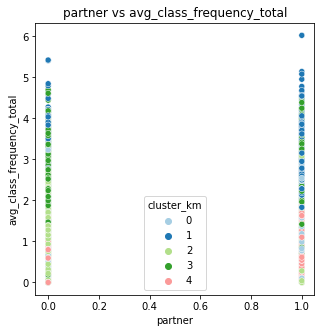

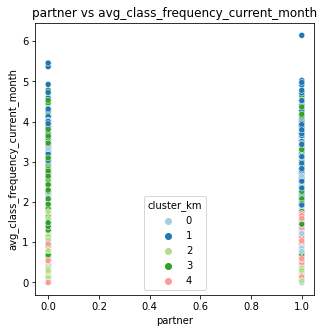

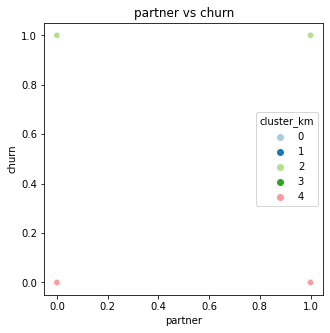

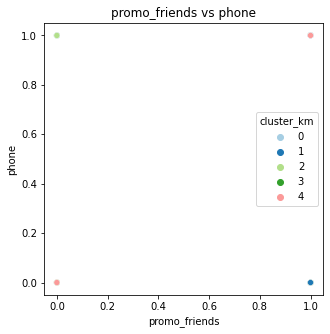

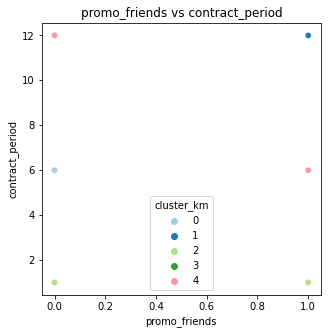

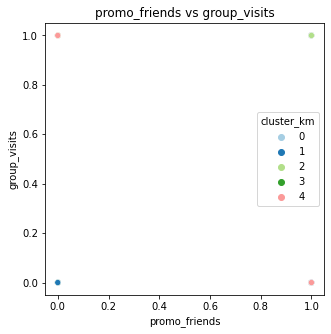

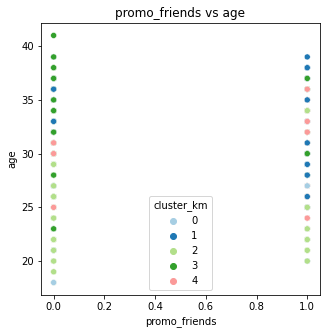

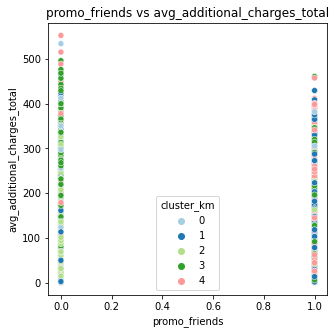

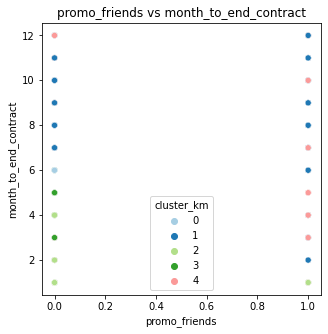

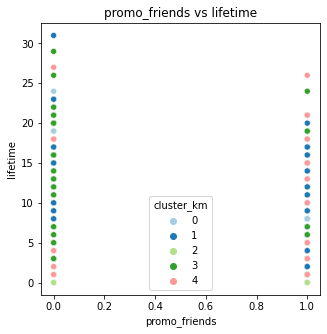

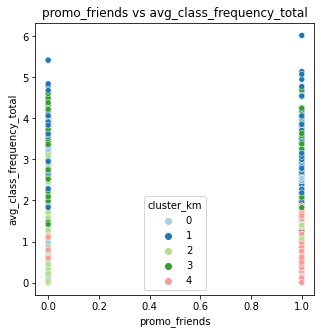

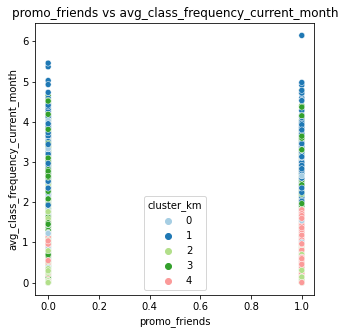

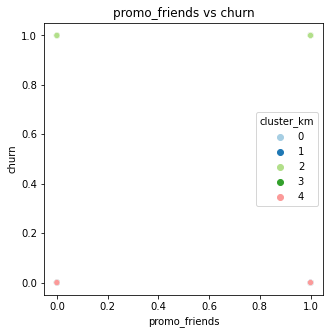

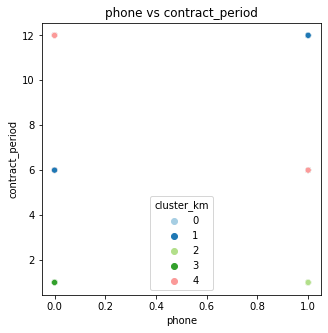

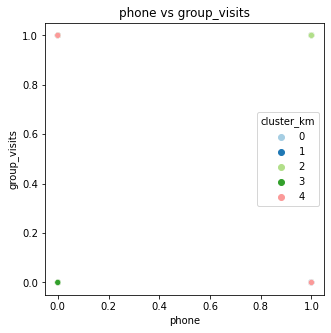

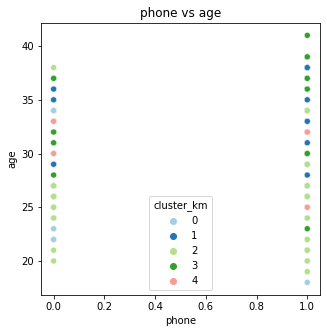

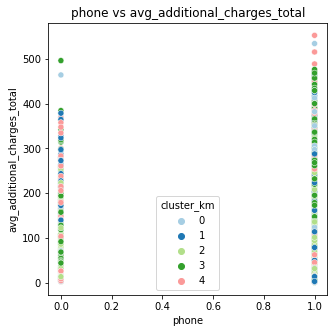

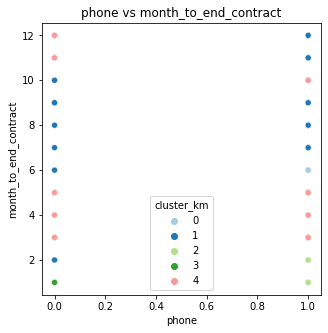

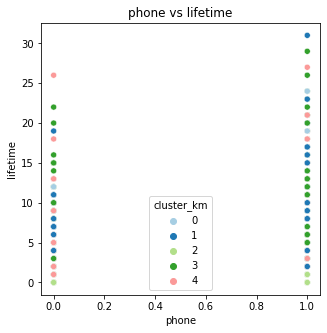

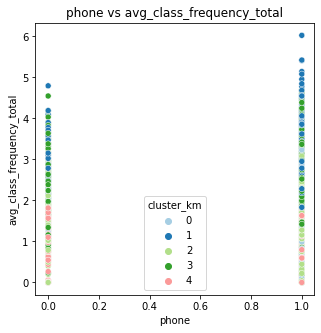

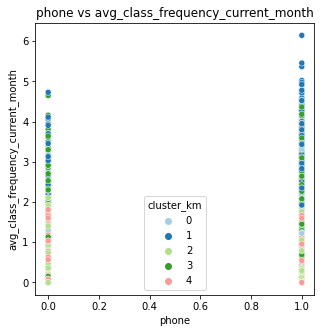

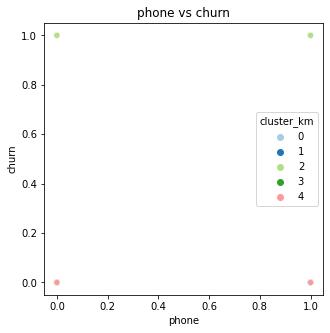

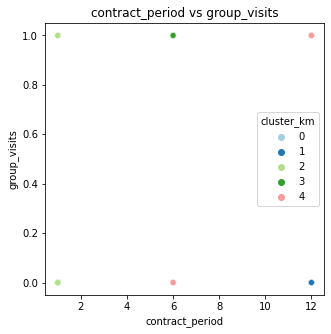

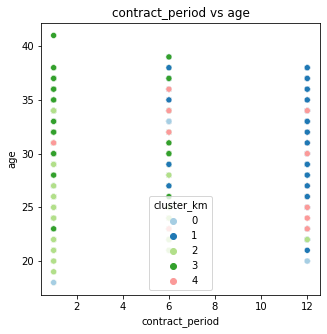

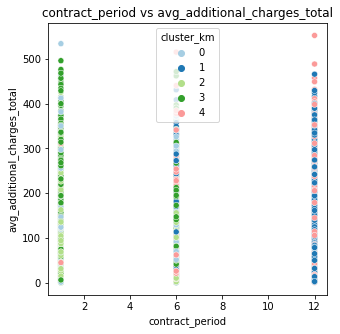

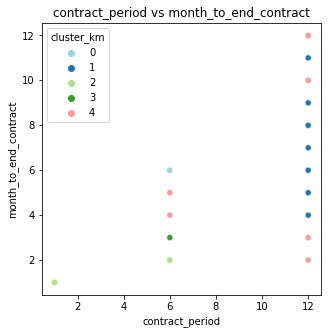

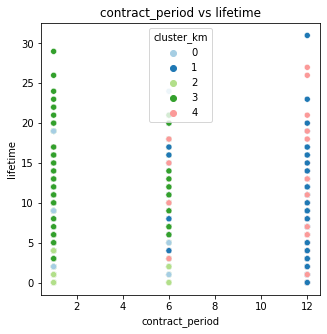

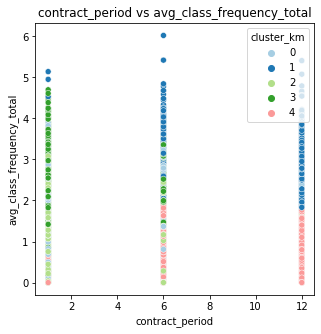

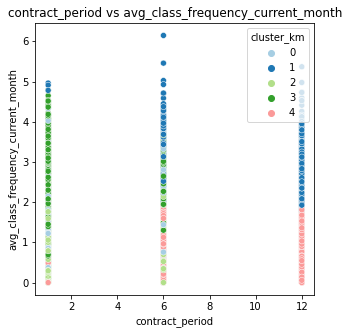

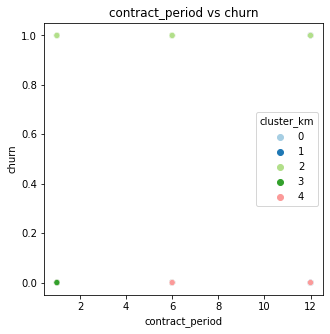

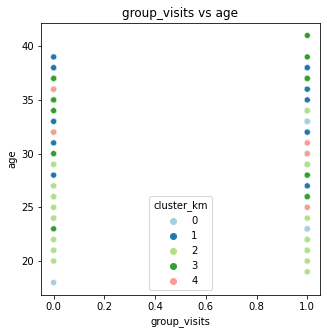

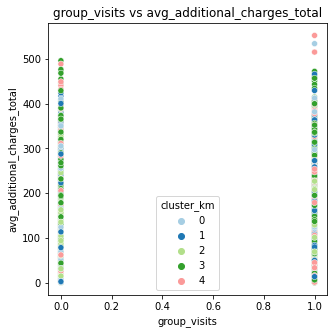

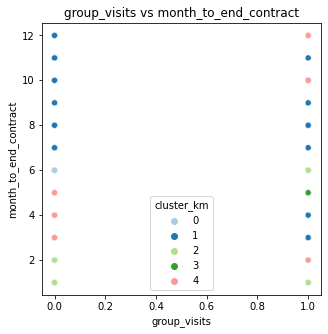

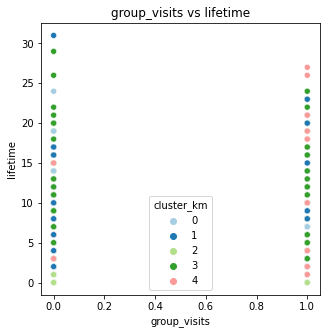

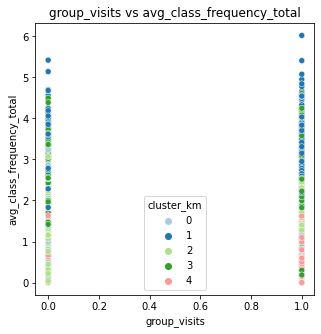

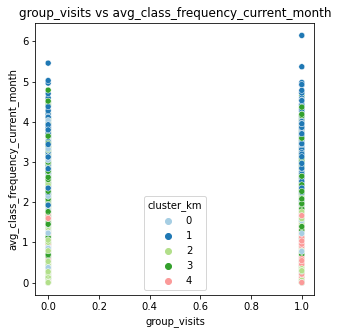

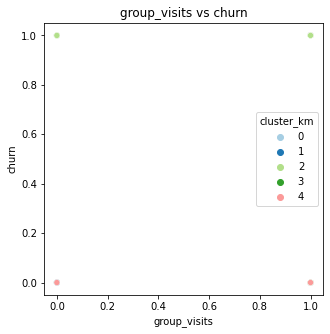

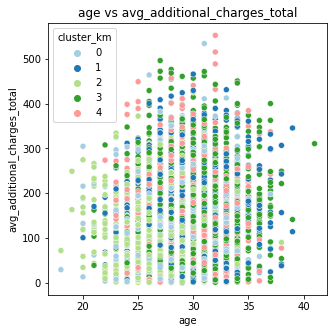

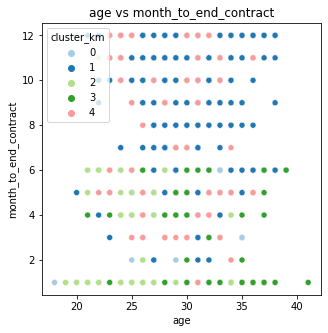

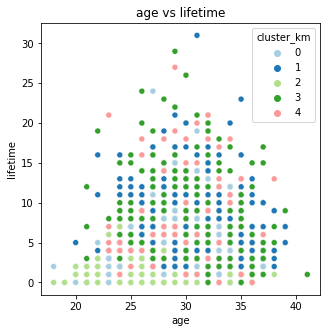

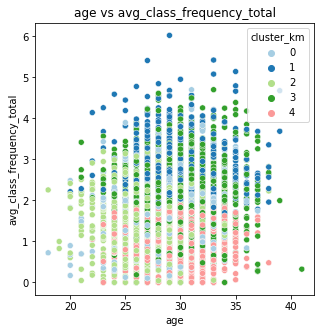

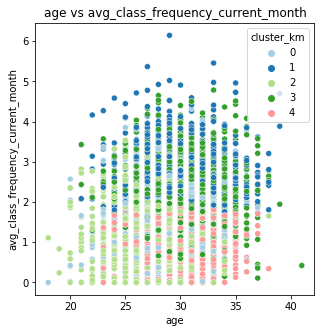

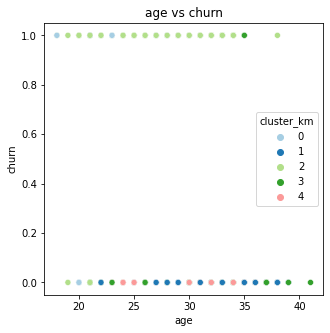

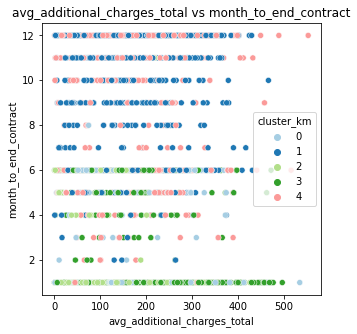

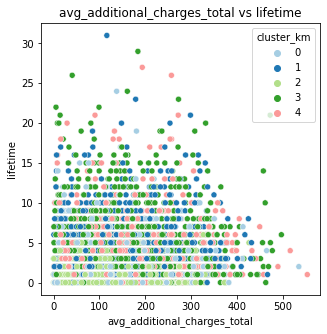

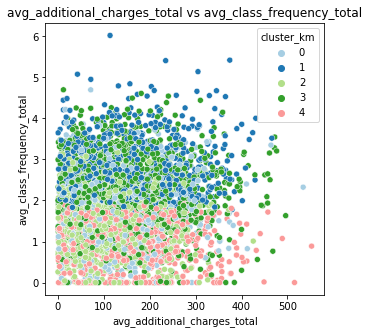

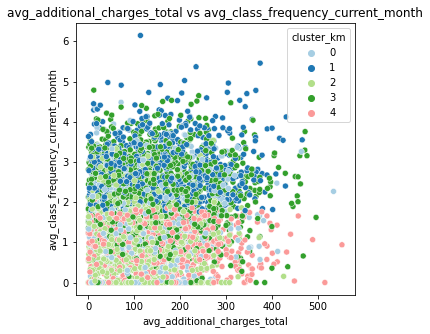

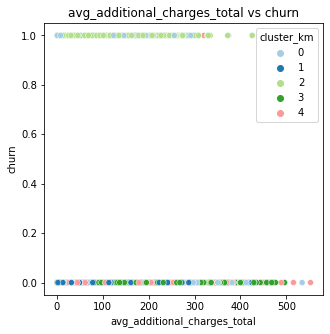

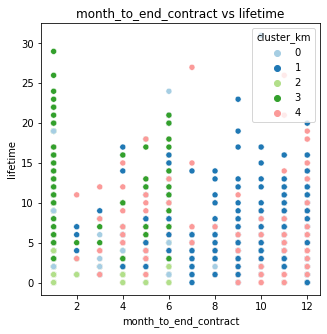

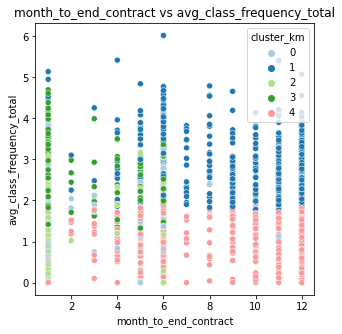

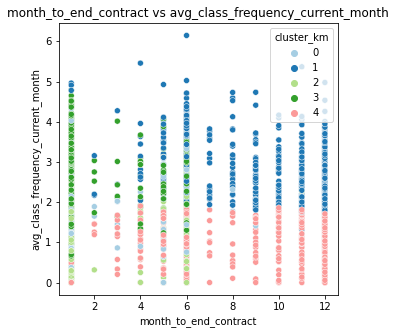

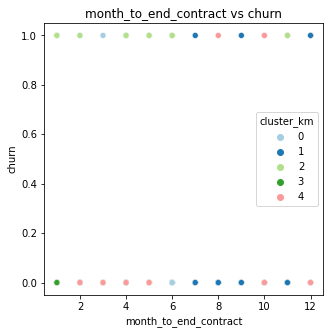

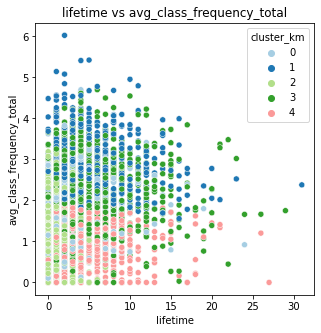

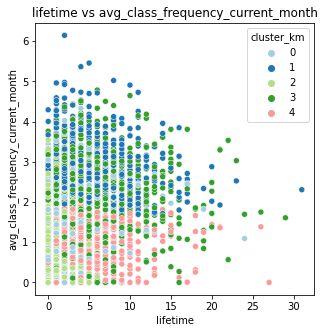

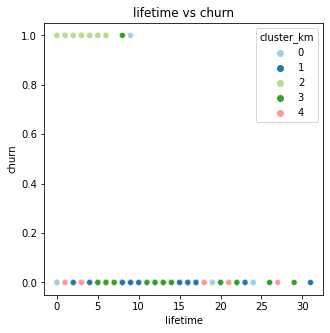

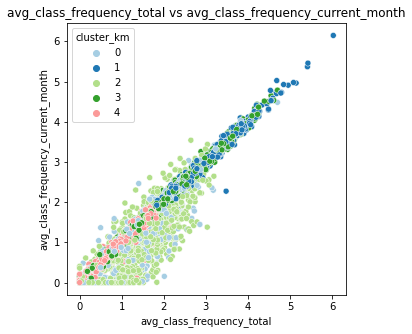

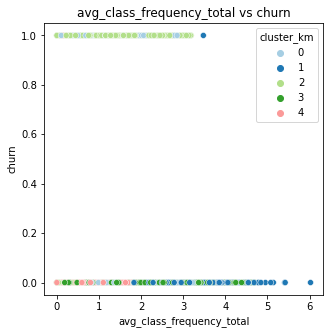

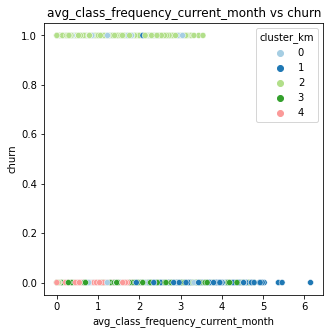

In [31]:
# нарисуем графики для попарных сочетаний признаков с разметкой по кластерам

col_pairs = list(itertools.combinations(df.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'cluster_km')

- возраст муж в кластерах 2 и 0 до 27 лет
- в кластере 2 до окончания абонемента менее 2-х мес
- за последний мес еженедельное посещение жен из кластера 2 стремится к нулю
- клиенты из кластера 0 не проживают или работают в районе, где находится фитнес-центр (в отличие от клиентов из кластера 2)
- во второй кластер вошли клиенты, которые не участвуют ни в акции "приведи друга", ни являются сотрудниками компаний-партнеров

# Выводы и базовые рекомендации по работе с клиентами

Сформулируем основные выводы и предложим рекомендации для стратегии взаимодействия с клиентами и их удержания.
Выделим 3-4 важных принципа и опишем примеры их реализации в виде определённых маркетинговых действий.

**Для решения задач исследования нами были выполнены следующие шаги.**

1) Мы провели изучение и предобработку данных:

    - привели наименования столбцов к нижнему регистру,
    - заменили тип данных с float на int в поле 'Month_to_end_contract',
    - не обнаружили пропусков,
    - убедились в отсутсвие явных дубликатов,
    - сделали первичные наблюдения, применив метод describe():
        - с начала действия обонемента 88 клиентов так ни разу и не посетили спортзал. 181 клиент не посещал зал в течение последнего месяца,
        - четверть клиентов определена в группу тех, кто ушел,
        - гендерное распределение примерно 50/50,
        - клиенты в основном посещают зал рядом с домом/работой,
        - почти половина клиентов является сотрудниками компаний-партнёров клуба,
        - чуть менее трети клеинтов пришли по акции "приведи друга",
        - 90% оставляют номер тел,
        - виды обонементов: на 1, 6 и 12 мес. Причем третья перцентиль 6 мес,
        - средний и медианный возраст 29 лет,
        - в среднем 4 мес осталось у клиентов до истечения срока действия абонемента,
        - медиана Lifetime - 3 мес. 5 мес - лишь третья перцентиль Lifetime,
        - клиенты посещают зал менее 2х раз в неделю. Причем средний показатель за последний мес ниже среднего показателя за весь период (1.7 против 1.8).

2) Провели исследовательский анализ данных. Построили гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался. Наши наблюдения о группе тех, кто ушел:

    - нет гендерных отличий от оставшихся;
    - живут/работают дальше от зала, чем те, кто остался;
    - среди них гораздо меньше сотрудников компаний-партнёров клуба;
    - меньше пришло по акции "приведи друга";
    - оставляют номер тел также частно, как и оставшиеся;
    - чаще покупают абонементы на месяц (средняя длительность действующего абонемента в 3,3 раза ниже, чем у оставшихся);
    - меньше ходят на групповые занятия;
    - средний возраст ниже (27 лет), чем у оставшихся (30 лет);
    - в среднем тратят меньше на прочие услуги клуба;
    - срок до окончания текущего действующего абонемента (в месяцах) в среднем 1,5 мес. в отличие от тех, кто остался (5 мес);
    - лайфтайм в среднем 1 месяц. Случаи свыше 4-х мес похожи на выбросы;
    - в среднем посещают 1.5 раза в неделю (оставшиеся - 2 раза);
    - за последний месяц свыше 175 клиентов вовсе не посещали клубы, т.о. в среднем посещение снизилось до 1 раза в неделю. Тогда как у оставшихся сохранилась частота 2 раза/нед.
    
3) Рассчитали коэф корреляции phik, построили и отобразили матрицу корреляций: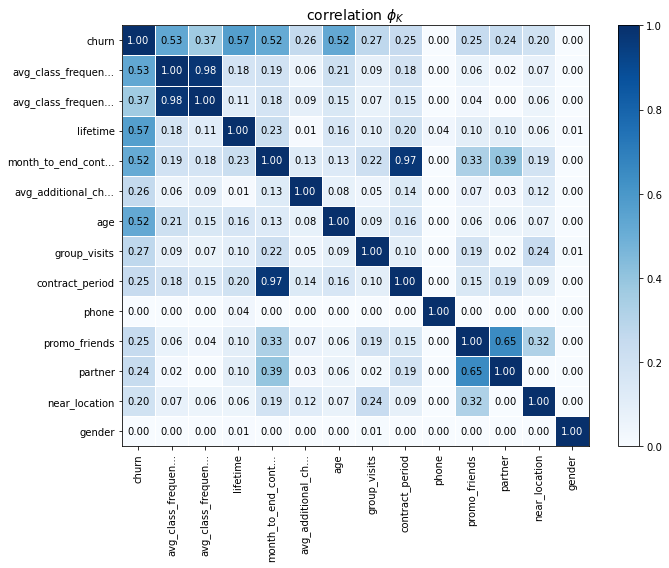

    - сотрудник компании-партнёра клуба `partner` и привлеченный по акции "приведи друга" `promo_friends` (0.65). Видимо, клуб учитывает в акции "приведи друга" тех, кто приходит в качестве сотрудника компании-партнёра. То есть компания-партнер выступает к качестве того, кто привлекает в клуб друзей. 
    - `lifetime` и `churn` (0.57). Чем дольше клиент пользуется услугами фитне-центов, тем он менее склонен к уходу. 
    - `avg_class_frequency_total` и `churn` (0.37), `avg_class_frequency_current_month` и `churn` (0.53). Чем чаще клиенты посещают клуб, тем меньше они склонны прекращать посещение. Причем корреляция с данными за последний месяц гораздо сильнее, чем со статистикой за весь период.
    - `month_to_end_contract` и `churn` (0.52). Чем больше времени до истечения абонемента, тем клиенты менее склонны прекращать посещение спортзала.
    - `promo_friends` и `month_to_end_contract` (0.33). Похоже, что акция запущена относительно недавно, т.к. видим более длительные сроки до конца абонемента.
    - похоже, что в партнерских программах участвуют длинные абонементы, так как есть корреляция м/д `partner` и `month_to_end_contract` (0.39). 
    - `contract_period` и `month_to_end_contract` (0.97). Это очевидно: чем длинее абонемент, тем больше времени осталось до его истечения.
    - `lifetime` и `month_to_end_contract` (0.23). Лояльные клиенты покупают длинные абонементы.
    - `avg_additional_charges_total` и `churn` (0.26). Клиенты, которые пользуются доп услугами, менее склонны покидать спортзал. Им нравится наш сервис.
    - `age` и `churn` (0.52), `age` и `avg_class_frequency_current_month` (0.21). Выше мы уже заметили, что средний возраст бросивших заниматься ниже, чем у тех, кто продолжает ходить в спортзал.
    - `group_visits` и `churn` (0.27). Напрашивается тоже самое предположение, что и с доп сервисами. Видим также корреляцию м/д `group_visits` и `month_to_end_contract` (0.22), а также `near_location` (0.24).
    - `contract_period` и `churn` (0.25). Чем выше длительность текущего действующего абонемента, тем меньше оттока. Клиенты менее склонны бросать спортзал, если берут длинные абонементы.
    - `promo_friends` и `near_location` (0.32). Клиенты советуют друзьям (живущим неподалеку) и коллегам.
    - `promo_friends` и `month_to_end_contract` (0.33). Привлеченные по акции клиенты берут абонементы на более длительный срок.
    - `partner` и `churn` (0.24). Отток среди сотрудников компаний-партнеров ниже.

Подтвердили статистическую значимость выявленных корреляций. 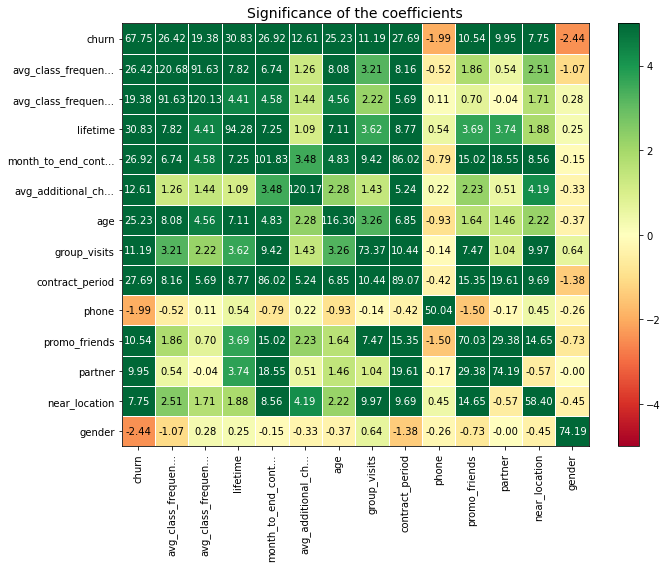

Высокие значения глобального коэф корреляции:'avg_class_frequency_total', 'avg_class_frequency_current_month', 

Средние значения глобального коэф корреляции: 'partner', 'promo_friends', 'contract_period' , 'lifetime', 'age', 'near_location','group_visits' 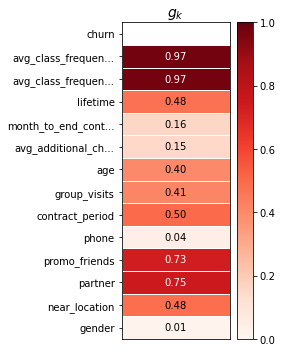

4) Построили модель бинарной классификации клиентов. Разбили данные на обучающую и валидационную выборку. Обучили модель на train-выборке двумя способами: логистической регрессией, случайным лесом. На основании метрик определили, что модель логистической регрессии показала лучшие результаты. 

5) Стандартизировали данные. Построили матрицу расстояний и нарисовали дендрограмму, которая выделила 5 кластеров. 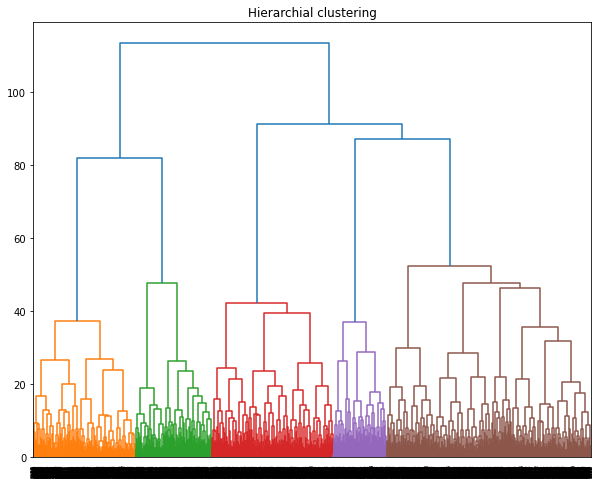

6) Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов. Во втором кластере отток составил 96%, в нулевом - 45%. В остальных кластерах отток менее 2.5%. Ниже всего показатель оттока у 3-го кластера (всего 0.3%).

7) Построили гистограммы для каджого признака внутри кластеров. Алгоритм определил всех ушедших во второй кластер. Во всех группах признаков преобладают ушедшие.

8) Нарисовали графики для попарных сочетаний признаков с разметкой по кластерам:

    - возраст муж в кластерах 2 и 0 до 27 лет
    - в кластере 2 до окончания абонемента менее 2-х мес
    - за последний мес еженедельное посещение жен из кластера 2 стремится к нулю
    - клиенты из кластера 0 не проживают или работают в районе, где находится фитнес-центр (в отличие от клиентов из кластера 2)
    - во второй кластер вошли клиенты, которые не участвуют ни в акции "приведи друга", ни являются сотрудниками компаний-партнеров

**Рекомендации по работе с клиентами**

На основании полученных результатов сформулированы следующие рекомендации:

1) Основной отток среди клиентов до 27 лет с абонементами сроком 2 мес и меньше. Следует активно поощрять приобретение годовых абонементов среди данной возрастной группы, в том числе пересмотрев ценовую политику стоимости абонементов с разными сроками (в сторону некоторого увеличения цены коротких абонементов).

2) Среди ушедших клиентов большинство не являются сотрудниками компаний-партнеров. Следует увеличить активность В2В продаж, в том числе готовить кастомные предложения для каждого бизнеса отдельно.

3) Чем дольше клиент пользуется услугами фитне-центов, тем он менее склонен к уходу. Следует увеличивать лояльность клиентов, в том числе предлагать прогрессивную систему бонусов и скидок для тех, кто остается клиентом сети фитнес-центров более 12, 24 и т.д. месяцев.